# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
path_colab_notebooks = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## Residual Networks (ResNet)

En este ejercicio vamos a mostrar la arquitectura ResNet. Ésta red neuronal fue introducida por Microsoft pasa su framework como alternativa de red muy profunda, ganando la competición ILSVRC (ImageNet Large Scale Visual Recognition Challenge) en el año 2015. El paper donde presentaron la arquitectura es el siguiente: 

- Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun (2015). Deep Residual Learning for Image Recognition. The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 770-778

El grupo de investigadores presentó un framework para el aprendizaje residual a fin de facilitar la conformación de redes neuronales mucho más profundas que las utilizadas hasta ese momento. En la propuesta se reformulan explícitamente las capas como funciones residuales de aprendizaje con referencia a las entradas de capas. Se proporcionó pruebas empíricas exhaustivas que demostraban que estas redes residuales son más fáciles de optimizar y pueden obtener precisión a partir de una profundidad considerablemente mayor.

Una red neuronal residual (ResNet) es una red neuronal artificial (ANN) de un tipo cuya construcción se basa en estructuras conocidas como células piramidales en la corteza cerebral. Las redes neuronales residuales efectúan esta labor utilizando conexiones de salto o atajos para saltar sobre algunas capas. Los modelos típicos de ResNet se implementan con brincos de doble o triple capa que contienen no linealidades (ReLu) y normalización de lotes en el medio.

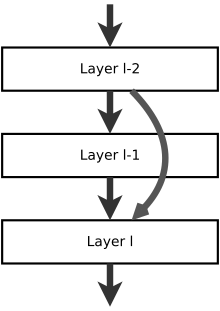

In [4]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig23.png')

Si se hipotetiza que múltiples capas no lineales pueden aproximarse asintóticamente a funciones complicadas, entonces es equivalente a la hipótesis de que pueden aproximarse asintóticamente a las funciones residuales.

### Modelo y especificaciones

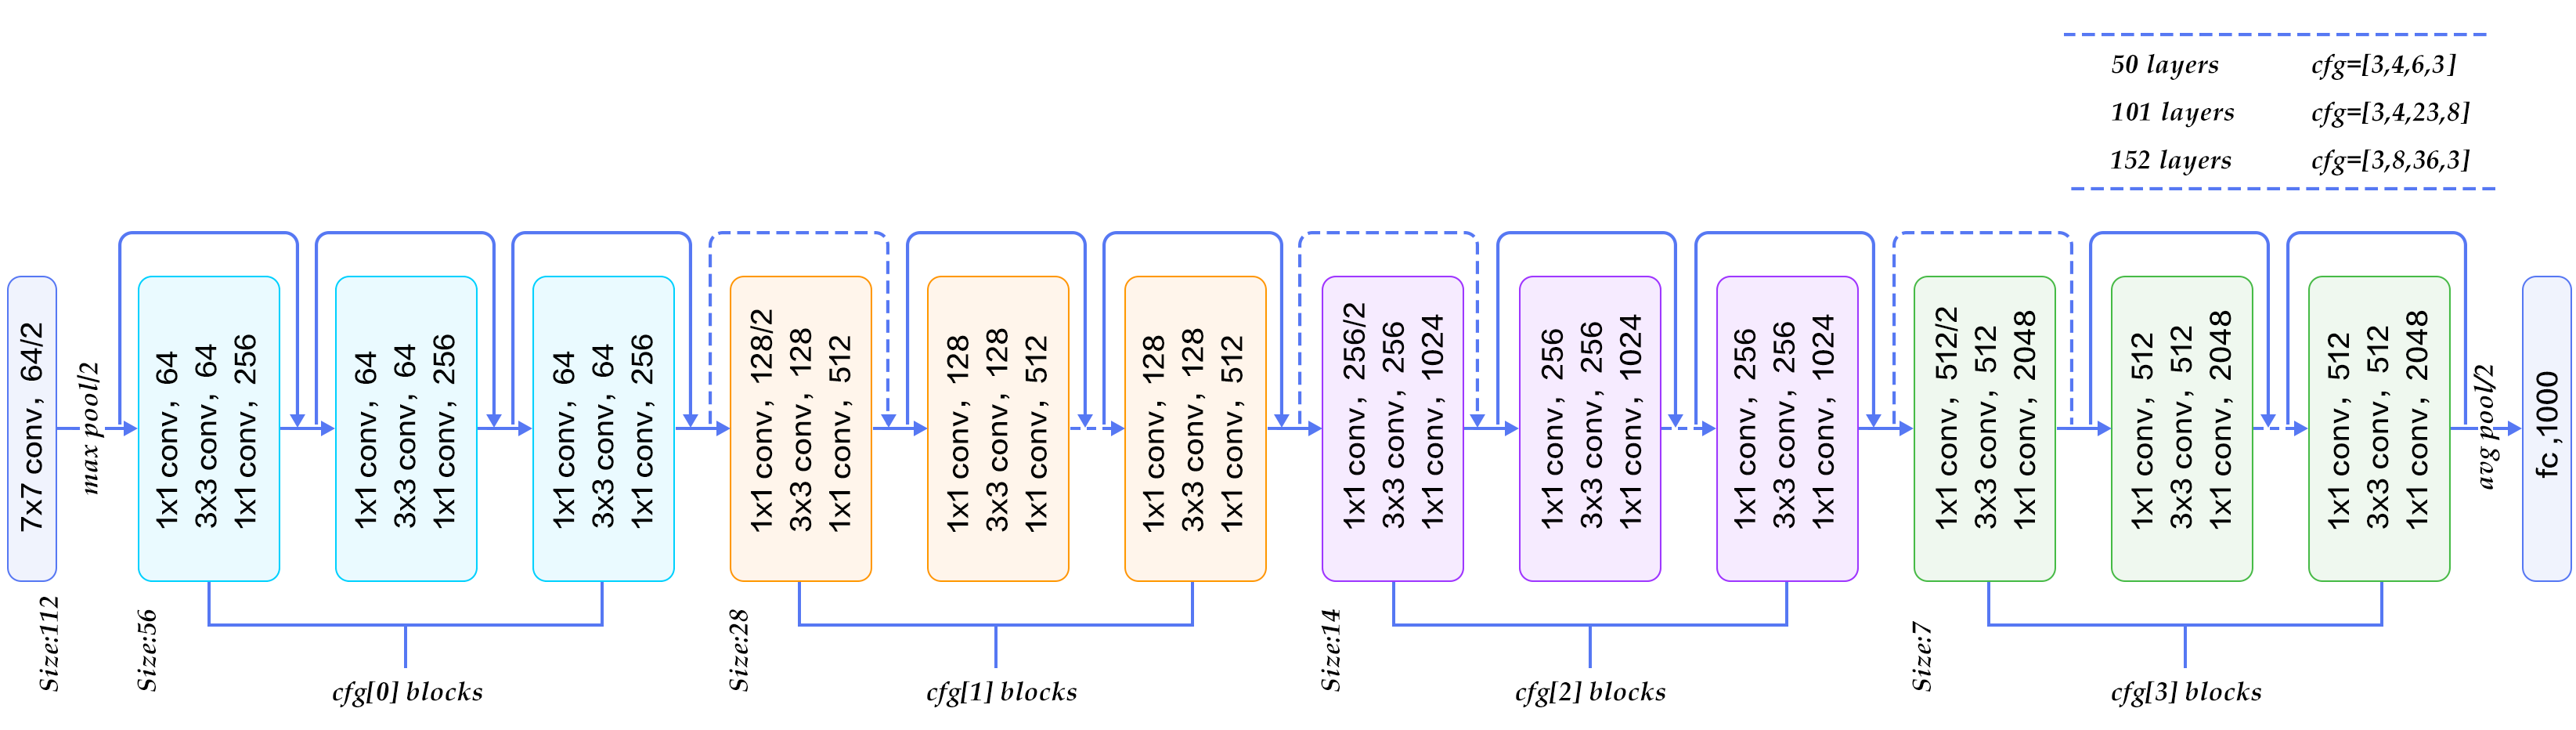

In [5]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig24.png')

La idea, muy resumida, se basa en aumentar el número de capas introduciendo una conexión residual (con una capa identidad). Esta capa pasa a la siguiente directamente, mejorando el proceso de aprendizaje.

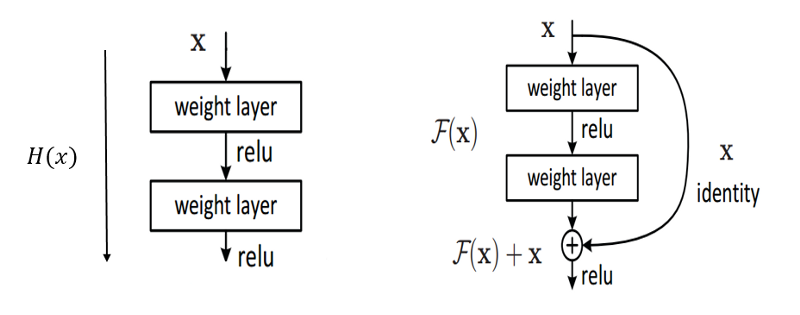

In [6]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig25.png')

Realizaremos el mismo experimento que en las partes anteriores.

### Importando las librerías necesarias

In [7]:
import numpy as np
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf

### Preparando el conjunto de datos

Como antes, usaremos el conjunto de datos CIFAR-100, que, como ya dijimos, consta de 60000 imágenes por cada clase de un total de 100 clases. Se divide en 50000 imágenes para entrenamiento y 10000 imágenes para validación por cada clase. Las 100 clases están agrupadas en 20 superclases. Cada imagen tiene una etiqueta *fina* (la clase, de entre las 100, a la que pertenece) y una etiqueta *gruesa* (correspondiente a su superclase):

In [8]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

169017344/169001437 [==============================] - 5s 0us/step


Como antes hasta este punto hemos descargado los datasets de entrenamiento y validación. *x_train_original* y *x_test_original* son los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que *y_train_original* y *y_test_original* son los datasets con las etiquetas.

Veíamos que la forma de *y_train_original* era la siguiente:

In [9]:
y_train_original.shape

(50000, 1)

In [10]:
y_train_original

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

Así que, inicialmente, había que convertirlo en su versión **one-hot-encoding**:

In [11]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [12]:
y_train.shape

(50000, 100)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

El siguiente paso era ver los datos de entrenamiento (x_train_original):

In [14]:
x_train_original.shape

(50000, 32, 32, 3)

In [15]:
x_train_original[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

Representa la imagen en los 3 canales RGB de 256 píxeles. Nuevamente vamos a ver una, la última por ejemplo:

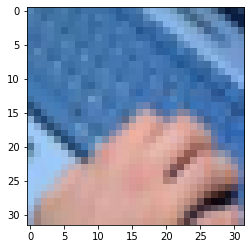

In [17]:
imgplot = plt.imshow(x_train_original[10])
plt.show()

### Preparando el entorno

Especificábamos la situación de los canales de las imágenes y la fase del experimento. Nuevamente especificar a Keras dónde se encuentran los canales. En un array de imagenes, pueden venir como último indice o como el primero. Esto se conoce como canales primero (*channels firs*t) o canales al final (*channels last*). En nuestro caso, vamos a definirlos al final. El parámetro *image_data_format* afecta la forma en que cada uno de los frameworks trata las dimensiones de los datos. Específicamente, define dónde está la dimensión de los canales en los datos de entrada. Para Tensorflow o CNTK debe ser *channels_last*, para Theano debería ser *channels_first*.

In [18]:
K.set_image_data_format('channels_last')
#K.set_learning_phase(1)

### Arquitectura de la red: Red neuronal convolucional ResNet

Keras tiene a nuestra disposición ésta arquitectura, simplemente debemos configurarla para nuestro diseño.

Lo que hacíamos a continuación, era normalizar las imágenes dividiéndo cada elemento por el numero de píxeles, es decir, 255. Con lo que obteníamos el array con valores de entre 0 y 1:

In [19]:
x_train = x_train_original/255.0
x_test = x_test_original/255.0

Con esto, tenemos las imágenes a 32X32 píxeles normalizadas en *x_train* y *x_test*.

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
x_train[10]

array([[[0.3254902 , 0.51764706, 0.69803922],
        [0.2627451 , 0.44705882, 0.62745098],
        [0.23921569, 0.42352941, 0.60392157],
        ...,
        [0.03529412, 0.10196078, 0.22352941],
        [0.0627451 , 0.13333333, 0.25882353],
        [0.1372549 , 0.23137255, 0.36862745]],

       [[0.29411765, 0.48627451, 0.67843137],
        [0.27843137, 0.46666667, 0.65490196],
        [0.21568627, 0.40392157, 0.59607843],
        ...,
        [0.15294118, 0.2627451 , 0.41960784],
        [0.03529412, 0.10980392, 0.25490196],
        [0.04705882, 0.12156863, 0.25882353]],

       [[0.28627451, 0.4745098 , 0.67843137],
        [0.26666667, 0.45098039, 0.65098039],
        [0.29019608, 0.47843137, 0.6745098 ],
        ...,
        [0.35686275, 0.51764706, 0.69803922],
        [0.20784314, 0.3254902 , 0.49019608],
        [0.05490196, 0.13333333, 0.2745098 ]],

       ...,

       [[0.62352941, 0.73333333, 0.8745098 ],
        [0.58823529, 0.57254902, 0.62352941],
        [0.74901961, 0

### Preparando el entorno

In [23]:
#from keras.applications import resnet50
from tensorflow.keras.applications import resnet50

def create_custom_resnet50(): 
  model = resnet50.ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=100)

  return model


    Los parámetros de ResNet50 son:
- *include_top*: Si se deben incluir las 3 capas completamente conectadas en la parte superior de la red.
- *weights*: Uno de None (inicialización aleatoria) o "imagenet" (pre-entrenamiento en ImageNet).
- *input_tensor*: Tensor Keras opcional (es decir, salida de layers.Input()) para utilizarlo como entrada de imagen para el modelo.

In [24]:
custom_resnet50_model = create_custom_resnet50()  
custom_resnet50_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Una vez hecho esto, vamos a ver un resumen del modelo creado:

In [25]:
custom_resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

Recordemos que la arquitectura VGG-16 tenía aproximadamente 34 millones de parámetros a entrenar. Esto quiere decir que hemos aumentado considerablemente la profundidad de la red, pero hemos reducido el número de parámetros a entrenar.

Bien, dicho esto, pasamos a entrenar el modelo.

In [26]:
crn50 = custom_resnet50_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 166s 96ms/step - loss: 4.6936 - acc: 0.0863 - mse: 0.0101 - val_loss: 3.9062 - val_acc: 0.1121 - val_mse: 0.0096
Epoch 2/10
1563/1563 [==============================] - 148s 94ms/step - loss: 4.1297 - acc: 0.1435 - mse: 0.0097 - val_loss: 4.0661 - val_acc: 0.1690 - val_mse: 0.0093
Epoch 3/10
1563/1563 [==============================] - 151s 97ms/step - loss: 3.7997 - acc: 0.1849 - mse: 0.0094 - val_loss: 3.6779 - val_acc: 0.1964 - val_mse: 0.0092
Epoch 4/10
1563/1563 [==============================] - 148s 94ms/step - loss: 3.5408 - acc: 0.2178 - mse: 0.0092 - val_loss: 4.9901 - val_acc: 0.2334 - val_mse: 0.0090
Epoch 5/10
1563/1563 [==============================] - 148s 95ms/step - loss: 3.3290 - acc: 0.2340 - mse: 0.0091 - val_loss: 3.4251 - val_acc: 0.2304 - val_mse: 0.0090
Epoch 6/10
1563/1563 [==============================] - 149s 95ms/step - loss: 3.1193 - acc: 0.2613 - mse: 0.0089 - val_loss: 13.4272 - val_acc: 0.2292 - v

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente:

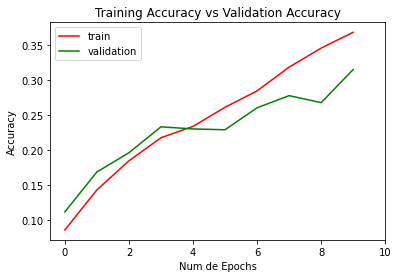

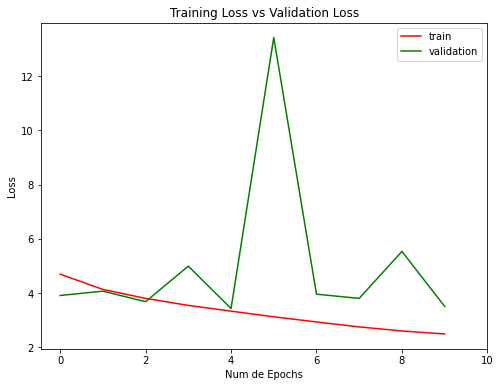

In [27]:
plt.figure(0)  
plt.plot(crn50.history['acc'],'r')  
plt.plot(crn50.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(crn50.history['loss'],'r')  
plt.plot(crn50.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

El entrenamiento ha dado muy buenos resultados y ha generalizado bien.

### Matriz de confusión

Pasemos ahora a ver la matriz de confusión y las métricas de *Accuracy*, *Recall* y *F1-score*.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:

313/313 [==============================] - 8s 22ms/step


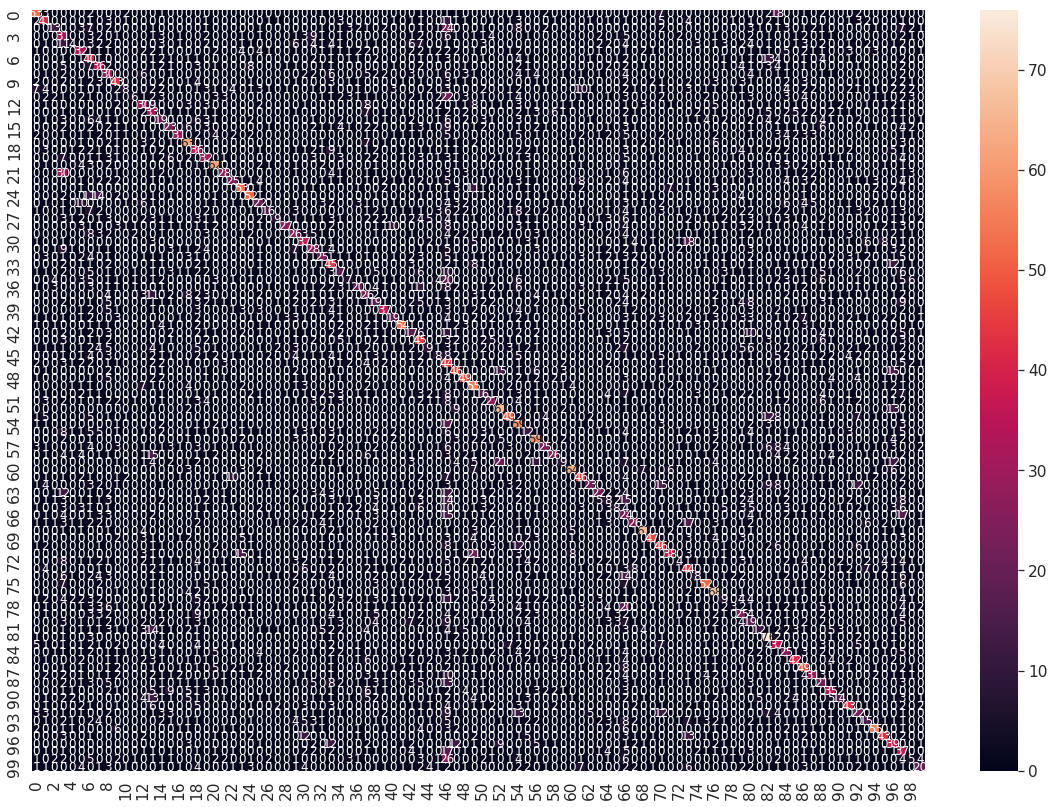

In [30]:
crn50_pred = custom_resnet50_model.predict(x_test, batch_size=32, verbose=1)  
crn50_predicted = np.argmax(crn50_pred, axis=1)

crn50_cm = confusion_matrix(np.argmax(y_test, axis=1), crn50_predicted)

# Visualizing of confusion matrix
crn50_df_cm = pd.DataFrame(crn50_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(crn50_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

Y por último, mostramos las métricas:

In [31]:
crn50_report = classification_report(np.argmax(y_test, axis=1), crn50_predicted)  
print(crn50_report)

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       100
           1       0.38      0.41      0.39       100
           2       0.42      0.13      0.20       100
           3       0.14      0.31      0.19       100
           4       0.20      0.04      0.07       100
           5       0.27      0.32      0.29       100
           6       0.20      0.40      0.26       100
           7       0.29      0.36      0.32       100
           8       0.20      0.30      0.24       100
           9       0.42      0.43      0.42       100
          10       0.38      0.08      0.13       100
          11       0.43      0.06      0.11       100
          12       0.31      0.30      0.30       100
          13       0.19      0.33      0.24       100
          14       0.19      0.19      0.19       100
          15       0.29      0.23      0.26       100
          16       0.62      0.31      0.41       100
          17       0.48    

### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar la curva ROC para clasificación multiclase.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


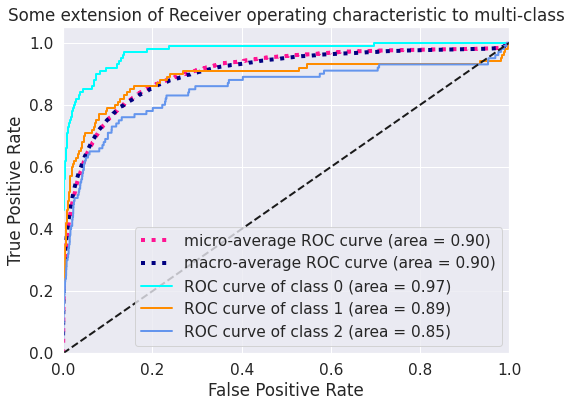

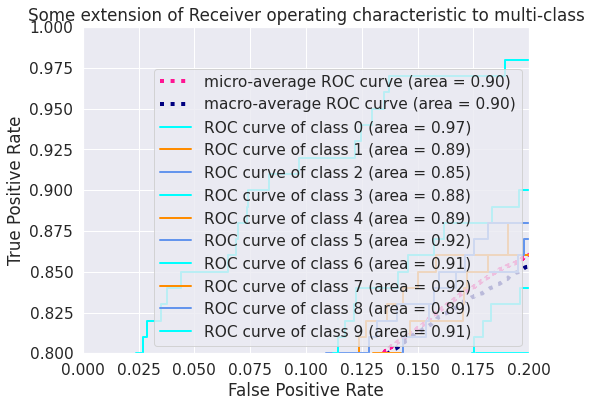

In [32]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], crn50_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), crn50_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(10), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

Vamos a ver algunos resultados:

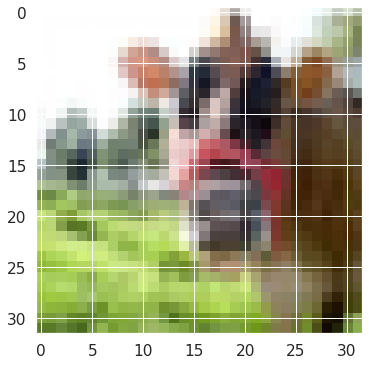

class for image: 49
predicted:         49


In [33]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(crn50_predicted[0]))

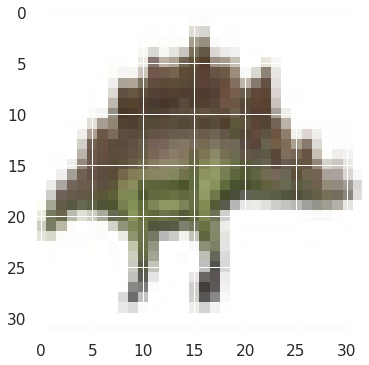

class for image: 33
predicted:         42


In [34]:
imgplot = plt.imshow(x_train_original[1])
plt.show()  
print('class for image: ' + str(np.argmax(y_test[1])))  
print('predicted:         ' + str(crn50_predicted[1]))

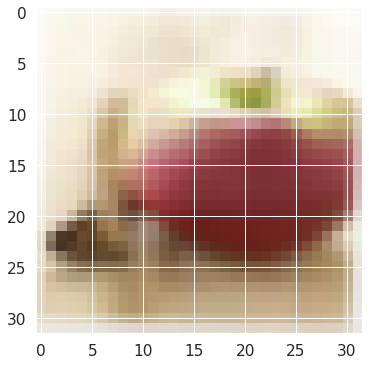

class for image: 72
predicted:         6


In [35]:
imgplot = plt.imshow(x_train_original[2])
plt.show()  
print('class for image: ' + str(np.argmax(y_test[2])))  
print('predicted:         ' + str(crn50_predicted[2]))

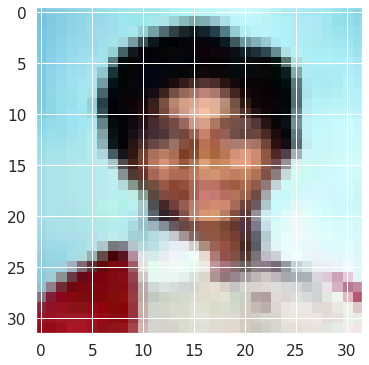

class for image: 51
predicted:         51


In [36]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(crn50_predicted[3]))

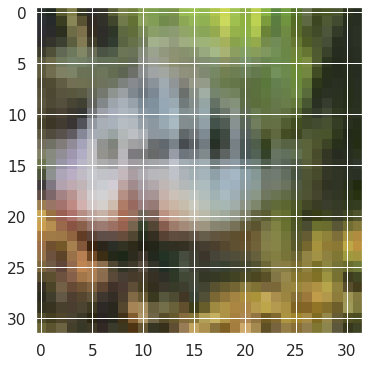

class for image: 71
predicted:         23


In [37]:
imgplot = plt.imshow(x_train_original[4])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[4])))  
print('predicted:         ' + str(crn50_predicted[4]))

Salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos. Además, vamos a salvar el modelo con los pesos entrenados para usarlos en el futuro.

In [38]:
# Modelo
custom_resnet50_model.save(valid_path + 'crn50.h5')

# Histórico
with open(valid_path + 'crn50_history.txt', 'wb') as file_pi:  
  pickle.dump(crn50.history, file_pi)

A continuación, vamos a comparar las métricas con los modelos anteriores (obviaremos el código que carga los datos de dichos modelos).

In [ ]:
plt.figure(0)  
plt.plot(snn.history['val_acc'],'r')  
#plt.plot(scnn.history['val_acc'],'g')  
#plt.plot(vgg16.history['val_acc'],'b')  
#plt.plot(vgg19.history['val_acc'],'y')  
#plt.plot(vgg16Bis.history['val_acc'],'m')  
plt.plot(crn50.history['val_acc'],'gold')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Simple NN Accuracy vs simple CNN Accuracy")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG','Custom ResNet'])

In [ ]:
plt.figure(0)  
plt.plot(snn.history['val_loss'],'r')  
plt.plot(scnn.history['val_loss'],'g')  
plt.plot(vgg16.history['val_loss'],'b')  
plt.plot(vgg19.history['val_loss'],'y')  
plt.plot(vgg16Bis.history['val_loss'],'m')  
plt.plot(crn50.history['val_loss'],'gold')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Simple NN Loss vs simple CNN Loss")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG','Custom ResNet'])

In [ ]:
plt.figure(0)  
plt.plot(snn.history['val_mean_squared_error'],'r')  
plt.plot(scnn.history['val_mean_squared_error'],'g')  
plt.plot(vgg16.history['val_mean_squared_error'],'b')  
plt.plot(vgg19.history['val_mean_squared_error'],'y')  
plt.plot(vgg16Bis.history['val_mean_squared_error'],'m')  
plt.plot(crn50.history['val_mean_squared_error'],'gold')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Mean Squared Error")  
plt.title("Simple NN MSE vs simple CNN MSE")  
plt.legend(['simple NN','CNN','VGG 16','VGG 19','Custom VGG','Custom ResNet'])

### Conclusión

Como se puede ver, la arquitectura marca una gran diferencia de desempeño. No sólo porque sea de los mejores resultados que las anteriores arquitecturas, sino también en los tiempos de entrenamiento, ya que permite aumentar las capas con un tiempo aceptable, y también en el número de parámetros, que se ha reducido considerablemente respecto a la arquitectura VGG.